In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the co2 emission data
df=pd.read_csv(r"C:\Users\Dell\gitproject\CO2-emissions-ML-project\data\raw\tidy_format_co2_emission_dataset.csv")

In [3]:
df.head()

,Country,Year,CO2EmissionRate (mt)
0,Afghanistan,2021,8.35
1,Albania,2021,4.59
2,Algeria,2021,173
3,Angola,2021,24.45
4,Antigua and Barbuda,2021,0.78


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               5572 non-null   object
 1   Year                  5572 non-null   int64 
 2   CO2EmissionRate (mt)  5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [5]:
#emission rate needs to be converted from string to numeric and'-' entrie to NaN
df.replace('-',np.nan,inplace = True)
df['CO2EmissionRate (mt)'] = df['CO2EmissionRate (mt)'].str.replace(',','').astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               5572 non-null   object 
 1   Year                  5572 non-null   int64  
 2   CO2EmissionRate (mt)  5450 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 130.7+ KB


In [7]:
df.rename(columns ={'CO2EmissionRate (mt)':'CO2EmissionRate'},inplace =True)

In [8]:
df= df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5450 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          5450 non-null   object 
 1   Year             5450 non-null   int64  
 2   CO2EmissionRate  5450 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 170.3+ KB


In [10]:
#looking into trends to audit the value
trend = df.groupby('Year')['CO2EmissionRate'].sum()
trend

Year
1990      805.100
1991      820.600
1992      964.300
1993      975.500
1994      971.100
1995      969.100
1996      964.200
1997      970.300
1998      961.400
1999      943.800
2000      983.100
2001      971.700
2002      967.000
2003     1002.900
2004     1025.300
2005     1042.100
2006     1041.500
2007     1060.200
2008     1044.200
2009      988.100
2010      962.300
2011      956.400
2012      935.100
2013      919.400
2014      917.000
2015     1026.700
2018     1056.000
2021    36715.662
Name: CO2EmissionRate, dtype: float64

In [11]:
avg_trend = df.groupby('Year')['CO2EmissionRate'].mean()
avg_trend

Year
1990      4.548588
1991      4.610112
1992      4.894924
1993      4.951777
1994      4.904545
1995      4.869849
1996      4.869697
1997      4.900505
1998      4.855556
1999      4.766667
2000      4.940201
2001      4.882915
2002      4.859296
2003      5.039698
2004      5.152261
2005      5.236683
2006      5.233668
2007      5.327638
2008      5.382474
2009      5.146354
2010      5.145989
2011      5.114439
2012      4.973936
2013      4.890426
2014      4.903743
2015      5.159296
2018      5.306533
2021    184.500814
Name: CO2EmissionRate, dtype: float64

In [12]:
#to drop the 2021 data as they are not consistent with rest of the data
df = df[df['Year']<2021]
df

,Country,Year,CO2EmissionRate
199,Afghanistan,1990,0.2
200,Albania,1990,2.3
201,Algeria,1990,3.0
202,Angola,1990,0.4
203,Antigua and Barbuda,1990,4.9
...,...,...,...
5567,Venezuela,2018,3.7
5568,Vietnam,2018,2.8
5569,Yemen,2018,0.4
5570,Zambia,2018,0.3


In [13]:
trend = df.groupby('Year')['CO2EmissionRate'].sum()
trend

Year
1990     805.1
1991     820.6
1992     964.3
1993     975.5
1994     971.1
1995     969.1
1996     964.2
1997     970.3
1998     961.4
1999     943.8
2000     983.1
2001     971.7
2002     967.0
2003    1002.9
2004    1025.3
2005    1042.1
2006    1041.5
2007    1060.2
2008    1044.2
2009     988.1
2010     962.3
2011     956.4
2012     935.1
2013     919.4
2014     917.0
2015    1026.7
2018    1056.0
Name: CO2EmissionRate, dtype: float64

In [14]:
avg_trend = df.groupby('Year')['CO2EmissionRate'].mean()
avg_trend

Year
1990    4.548588
1991    4.610112
1992    4.894924
1993    4.951777
1994    4.904545
1995    4.869849
1996    4.869697
1997    4.900505
1998    4.855556
1999    4.766667
2000    4.940201
2001    4.882915
2002    4.859296
2003    5.039698
2004    5.152261
2005    5.236683
2006    5.233668
2007    5.327638
2008    5.382474
2009    5.146354
2010    5.145989
2011    5.114439
2012    4.973936
2013    4.890426
2014    4.903743
2015    5.159296
2018    5.306533
Name: CO2EmissionRate, dtype: float64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


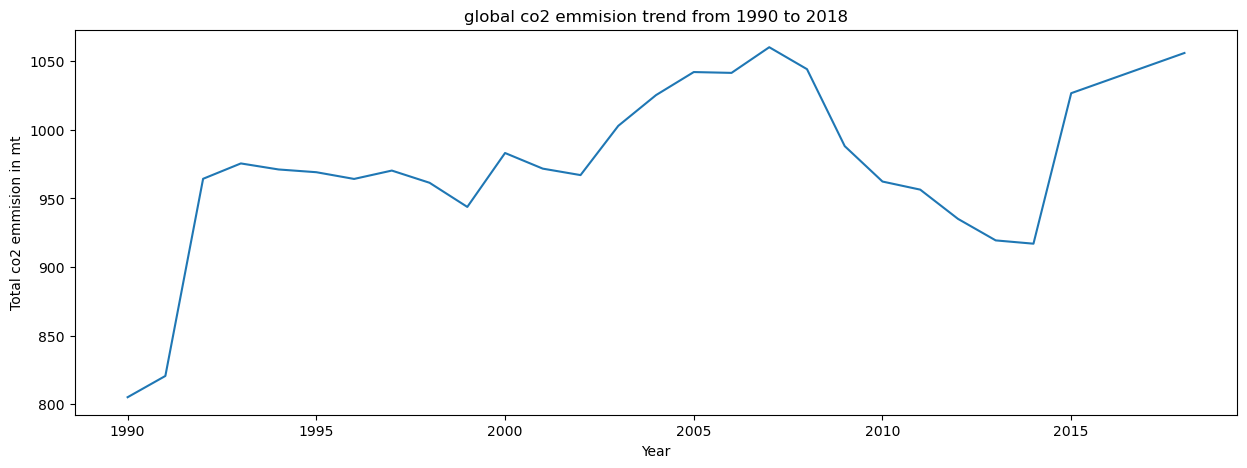

In [15]:
#line plot to visualize trend
plt.figure(figsize=(15,5))
sns.lineplot(x=trend.index,y= trend.values)
plt.xticks(rotation =0)
plt.title("global co2 emmision trend from 1990 to 2018")
plt.xlabel('Year')
plt.ylabel('Total co2 emmision in mt')
plt.show()

In [16]:
df.describe()

,Year,CO2EmissionRate
count,5251.000000,5251.000000
mean,2003.080175,4.997981
std,7.861967,6.571756
min,1990.000000,0.000000
25%,1996.000000,0.700000
50%,2003.000000,2.700000
75%,2010.000000,7.200000
max,2018.000000,65.800000


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5251.0,2003.080175,7.861967,1990.0,1996.0,2003.0,2010.0,2018.0
CO2EmissionRate,5251.0,4.997981,6.571756,0.0,0.7,2.7,7.2,65.8


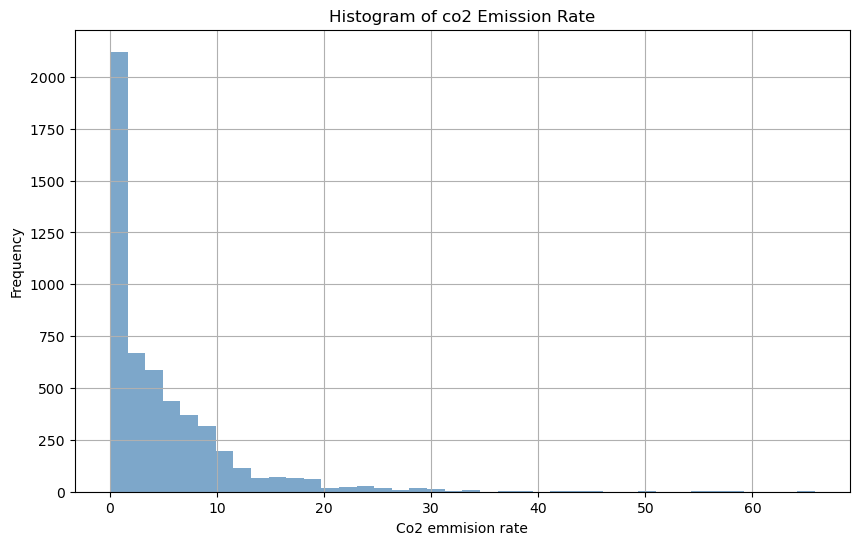

In [18]:
df['CO2EmissionRate'].hist(bins = 40,figsize =(10,6),color = 'steelblue',alpha =0.7)
plt.xlabel('Co2 emmision rate')
plt.ylabel('Frequency')
plt.title('Histogram of co2 Emission Rate')

plt.show()

In [19]:
#log transformation applied to the skewed data
df = df[df['CO2EmissionRate']>0]
df.loc[:,'CO2_Emission_log'] = df['CO2EmissionRate'].apply(lambda x : np.log10(x))
  
selected_columns = ['Country','Year','CO2EmissionRate','CO2_Emission_log']
df=df[selected_columns]



C:\Users\Dell\AppData\Local\Temp\ipykernel_2440\1614332804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'CO2_Emission_log'] = df['CO2EmissionRate'].apply(lambda x : np.log10(x))


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5152 entries, 199 to 5571
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           5152 non-null   object 
 1   Year              5152 non-null   int64  
 2   CO2EmissionRate   5152 non-null   float64
 3   CO2_Emission_log  5152 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 201.2+ KB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5152.0,2003.109666,7.852245,1990.0,1996.000000,2003.000000,2010.000000,2018.000000
CO2EmissionRate,5152.0,5.094022,6.597629,0.1,0.700000,2.900000,7.300000,65.800000
CO2_Emission_log,5152.0,0.325924,0.670364,-1.0,-0.154902,0.462398,0.863323,1.818226


In [22]:
df.duplicated().values.any()

False

In [23]:
df.head()

,Country,Year,CO2EmissionRate,CO2_Emission_log
199,Afghanistan,1990,0.2,-0.698970
200,Albania,1990,2.3,0.361728
201,Algeria,1990,3.0,0.477121
202,Angola,1990,0.4,-0.397940
203,Antigua and Barbuda,1990,4.9,0.690196


In [24]:
#save procesed data
df.to_csv("C:/Users/Dell/gitproject/CO2-emissions-ML-project/data/processed/clean_co2_emission_log_dataset.csv", index=False)


In [25]:
df_ll = pd.read_csv(r'C:\Users\Dell\gitproject\CO2-emissions-ML-project\data\raw\world_country_and_usa_states_latitude_and_longitude_values.csv')
df_ll.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [26]:
selected_columns = ['country','latitude','longitude']
df_ll = df_ll[selected_columns]
df_ll.head()

,country,latitude,longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615


In [27]:
df_ll.duplicated().values.any()

False

In [28]:
new_column_names = {'country':'Country',
                    'latitude':'Latitude',
                    'longitude':'Longitude'}
df_ll.rename(columns=new_column_names, inplace=True)

df_ll.sample(7)

,Country,Latitude,Longitude
239,Kosovo,42.602636,20.902977
167,New Zealand,-40.900557,174.885971
26,Brunei,4.535277,114.727669
208,Turks and Caicos Islands,21.694025,-71.797928
76,French Guiana,3.933889,-53.125782
107,Italy,41.871940,12.567380
133,Libya,26.335100,17.228331


In [29]:
df_ll.to_csv("C:/Users/Dell/gitproject/CO2-emissions-ML-project/data/processed/clean_lat_long_dataset.csv", index=False)

In [30]:
df.head()

,Country,Year,CO2EmissionRate,CO2_Emission_log
199,Afghanistan,1990,0.2,-0.698970
200,Albania,1990,2.3,0.361728
201,Algeria,1990,3.0,0.477121
202,Angola,1990,0.4,-0.397940
203,Antigua and Barbuda,1990,4.9,0.690196


In [31]:
df_ll.head()

,Country,Latitude,Longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615


In [32]:
#mearging both csv files 
df_merged_ll = pd.merge(df,df_ll,on = 'Country', how= 'left')
df_merged_ll.head()

,Country,Year,CO2EmissionRate,CO2_Emission_log,Latitude,Longitude
0,Afghanistan,1990,0.2,-0.698970,33.939110,67.709953
1,Albania,1990,2.3,0.361728,41.153332,20.168331
2,Algeria,1990,3.0,0.477121,28.033886,1.659626
3,Angola,1990,0.4,-0.397940,-11.202692,17.873887
4,Antigua and Barbuda,1990,4.9,0.690196,17.060816,-61.796428


In [33]:
df_merged_ll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           5152 non-null   object 
 1   Year              5152 non-null   int64  
 2   CO2EmissionRate   5152 non-null   float64
 3   CO2_Emission_log  5152 non-null   float64
 4   Latitude          4996 non-null   float64
 5   Longitude         4996 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 241.6+ KB


In [34]:
#to check which countries have null values after mergeed
df_merged_ll[df_merged_ll['Latitude'].isnull()]['Country'].unique()

array(['Democratic Republic of the Congo', 'Eswatini', 'Falkland Islands',
       'Ivory Coast', 'Myanmar',
       'Saint Helena, Ascension and Tristan da Cunha', 'North Macedonia'],
      dtype=object)

In [35]:
#using known alternate names to search for countries with missing entriess
search = 'Congo|Swaziland|Malvinas|Ivoire|Malvinas|Burma|Helena|Macedonia'

missing_countries = df_ll[df_ll['Country'].str.contains(search, case=False,regex = True)]
missing_countries

,Country,Latitude,Longitude
37,Congo [DRC],-4.038333,21.758664
39,Congo [Republic],-0.228021,15.827659
41,Côte d'Ivoire,7.539989,-5.547080
68,Falkland Islands [Islas Malvinas],-51.796253,-59.523613
140,Macedonia [FYROM],41.608635,21.745275
142,Myanmar [Burma],21.913965,95.956223
195,Saint Helena,-24.143474,-10.030696
207,Swaziland,-26.522503,31.465866


In [36]:
# Create dictionary to map country names in needed format

country_mapping = {
    'Congo [DRC]': 'Democratic Republic of the Congo',
    'Côte d\'Ivoire': 'Ivory Coast',
    'Falkland Islands [Islas Malvinas]': 'Falkland Islands',
    'Macedonia [FYROM]': 'North Macedonia',
    'Myanmar [Burma]': 'Myanmar',
    'Saint Helena': 'Saint Helena, Ascension and Tristan da Cunha',
    'Swaziland': 'Eswatini'
}

# Update 'Country' column using the dictionary

missing_countries.loc[:,'Country'] = missing_countries['Country'].replace(country_mapping)
missing_countries

,Country,Latitude,Longitude
37,Democratic Republic of the Congo,-4.038333,21.758664
39,Congo [Republic],-0.228021,15.827659
41,Ivory Coast,7.539989,-5.547080
68,Falkland Islands,-51.796253,-59.523613
140,North Macedonia,41.608635,21.745275
142,Myanmar,21.913965,95.956223
195,"Saint Helena, Ascension and Tristan da Cunha",-24.143474,-10.030696
207,Eswatini,-26.522503,31.465866


In [37]:
#update the missing latitude and longitude vlaues
for index , row in missing_countries.iterrows():
    country = row['Country']
    
    #Get the longitude an latitude from the missing countries 
    country_latitude = missing_countries.loc[missing_countries['Country'] == country , 'Latitude'].values[0]
    country_longitude = missing_countries.loc[missing_countries['Country'] == country , 'Longitude'].values[0]
    
    # Update the 'Latitude' and 'Longitude' columns in 'df_merged_ll'
    df_merged_ll.loc[df_merged_ll['Country'] == country, 'Latitude'] = country_latitude
    df_merged_ll.loc[df_merged_ll['Country'] == country, 'Longitude'] = country_longitude                                                                                                         

In [38]:
#check to confire no more null values
df_merged_ll[df_merged_ll['Latitude'].isnull()]['Country'].unique()

array([], dtype=object)

In [39]:
df_merged_ll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           5152 non-null   object 
 1   Year              5152 non-null   int64  
 2   CO2EmissionRate   5152 non-null   float64
 3   CO2_Emission_log  5152 non-null   float64
 4   Latitude          5152 non-null   float64
 5   Longitude         5152 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 241.6+ KB


In [40]:
ordered_columns = ['Year','Country','Latitude','Longitude','CO2EmissionRate','CO2_Emission_log']
df_merged_ll = df_merged_ll[ordered_columns]
df_merged_ll.head()

,Year,Country,Latitude,Longitude,CO2EmissionRate,CO2_Emission_log
0,1990,Afghanistan,33.939110,67.709953,0.2,-0.698970
1,1990,Albania,41.153332,20.168331,2.3,0.361728
2,1990,Algeria,28.033886,1.659626,3.0,0.477121
3,1990,Angola,-11.202692,17.873887,0.4,-0.397940
4,1990,Antigua and Barbuda,17.060816,-61.796428,4.9,0.690196


In [41]:
#saving the dataset merged  with latitude and longitude features
df_merged_ll.to_csv("C:/Users/Dell/gitproject/CO2-emissions-ML-project/data/processed/merged_lat_long_dataset.csv", index=False)

In [42]:
#loading datasets to extract the population and population density to be used as feaatures
df_p = pd.read_csv(r'C:\Users\Dell\gitproject\CO2-emissions-ML-project\data\raw\population_total_long.csv')

df_pd = pd.read_csv(r'C:\Users\Dell\gitproject\CO2-emissions-ML-project\data\raw\population_density_long.csv')


In [43]:
df_p.head()

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


In [44]:
df_pd.sample(5)

,Country Name,Year,Count
6999,St. Martin (French part),1994,523
1096,Ecuador,1966,19
4044,Iceland,1980,2
5088,Jordan,1985,32
7272,Suriname,1995,2


In [45]:
#Reaname column to maatch befre mergeing\
df_p = df_p.rename(columns={'Country Name' : 'Country','Count':'Population'},inplace = False)

#Filter to match the years available in the co2 emission dataset
df_p = df_p[df_p['Year'] >1989]

In [46]:
df_p.head()

,Country,Year,Population
6480,Aruba,1990,62149
6481,Afghanistan,1990,12412308
6482,Angola,1990,11848386
6483,Albania,1990,3286542
6484,Andorra,1990,54509


In [47]:
df_pd.head()

,Country Name,Year,Count
0,Aruba,1961,307
1,Afghanistan,1961,14
2,Angola,1961,4
3,Albania,1961,60
4,Andorra,1961,30


In [48]:
#Reaname column to maatch befre mergeing\
df_pd = df_pd.rename(columns={'Country Name' : 'Country','Count':'Population Density'},inplace = False)

#Filter to match the years available in the co2 emission dataset
df_pd = df_pd[df_pd['Year'] >1989]

In [49]:
df_pd.head()

,Country,Year,Population Density
6032,Aruba,1990,345
6033,Afghanistan,1990,19
6034,Angola,1990,9
6035,Albania,1990,119
6036,Andorra,1990,115


In [50]:
#merged population and population density on country anfd yrae
merged_df = df_p.merge(df_pd,on=['Country','Year'],how='left')

In [51]:
merged_df.head()

,Country,Year,Population,Population Density
0,Aruba,1990,62149,345.0
1,Afghanistan,1990,12412308,19.0
2,Angola,1990,11848386,9.0
3,Albania,1990,3286542,119.0
4,Andorra,1990,54509,115.0


In [52]:
#mearge all the features intyo one data framwe

df_finale = df_merged_ll.merge(merged_df, on=['Country','Year'],how = 'left')
df_finale.head()

,Year,Country,Latitude,Longitude,CO2EmissionRate,CO2_Emission_log,Population,Population Density
0,1990,Afghanistan,33.939110,67.709953,0.2,-0.698970,12412308.0,19.0
1,1990,Albania,41.153332,20.168331,2.3,0.361728,3286542.0,119.0
2,1990,Algeria,28.033886,1.659626,3.0,0.477121,25758869.0,10.0
3,1990,Angola,-11.202692,17.873887,0.4,-0.397940,11848386.0,9.0
4,1990,Antigua and Barbuda,17.060816,-61.796428,4.9,0.690196,62528.0,142.0


In [53]:
df_finale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                5152 non-null   int64  
 1   Country             5152 non-null   object 
 2   Latitude            5152 non-null   float64
 3   Longitude           5152 non-null   float64
 4   CO2EmissionRate     5152 non-null   float64
 5   CO2_Emission_log    5152 non-null   float64
 6   Population          4226 non-null   float64
 7   Population Density  4180 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 322.1+ KB


In [54]:
#using observed search terms for countries with mising entries rom inspection

search =','
countries_missing = merged_df[merged_df['Country'].str.contains(search,case = False,regex = True)]
countries_missing

,Country,Year,Population,Population Density
20,"Bahamas, The",1990,256223,25.0
39,"Congo, Dem. Rep.",1990,34612023,15.0
40,"Congo, Rep.",1990,2356737,6.0
58,"Egypt, Arab Rep.",1990,56134475,56.0
67,"Micronesia, Fed. Sts.",1990,96301,NaN
...,...,...,...,...
6002,"Korea, Rep.",2017,51466201,527.0
6015,"Macao SAR, China",2017,622585,20479.0
6055,"Korea, Dem. People’s Rep.",2017,25429985,211.0
6104,"Venezuela, RB",2017,29390409,33.0


In [55]:
countries_missing['Country'].unique()

array(['Bahamas, The', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Egypt, Arab Rep.', 'Micronesia, Fed. Sts.', 'Gambia, The',
       'Hong Kong SAR, China', 'Iran, Islamic Rep.', 'Korea, Rep.',
       'Macao SAR, China', 'Korea, Dem. People’s Rep.', 'Venezuela, RB',
       'Yemen, Rep.'], dtype=object)

In [56]:
# Create dictionary to map country names in required format
country_map = {
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
    'Bahamas, The': 'Bahamas',
    'Egypt, Arab Rep.': 'Egypt',
    'Hong Kong SAR, China': 'Hong Kong',
    'Iran, Islamic Rep.': 'Iran',
    'Korea, Rep.': 'South Korea',
    'Korea, Dem. People’s Rep.': 'North Korea',
    'Macao SAR, China': 'Macau',
    'Venezuela, RB': 'Venezuela',
    'Yemen, Rep.': 'Yemen'
}

# Update names in 'Country' column using the dictionary
merged_df.loc[:,'Country'] = merged_df['Country'].replace(country_map)
merged_df.sample(7)

,Country,Year,Population,Population Density
1194,Kuwait,1995,1605901,90.0
3525,Canada,2006,32571174,3.0
1210,Moldova,1995,3675099,127.0
3412,Malawi,2005,12625952,133.0
1981,Bosnia and Herzegovina,1999,3743354,73.0
251,Switzerland,1991,6799978,172.0
4615,Barbados,2011,282987,658.0


In [57]:
# Merge all the features together into one dataframe using updated population dataframe

df_finale = df_merged_ll.merge(merged_df, on=['Country', 'Year'], how='inner')
df_finale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4472 entries, 0 to 4471
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                4472 non-null   int64  
 1   Country             4472 non-null   object 
 2   Latitude            4472 non-null   float64
 3   Longitude           4472 non-null   float64
 4   CO2EmissionRate     4472 non-null   float64
 5   CO2_Emission_log    4472 non-null   float64
 6   Population          4472 non-null   int64  
 7   Population Density  4426 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 279.6+ KB


In [58]:
df_finale[df_finale['Population'].isnull()]['Country'].unique()

array([], dtype=object)

In [66]:
df_finale.dropna(subset=['Population Density'], inplace=True)

In [67]:
#saving final dataset merged with full feature
df_finale.to_csv("C:/Users/Dell/gitproject/CO2-emissions-ML-project/data/processed/merged_full_featured_dataset.csv", index=False)

In [68]:
df_finale.head(10)

,Year,Country,Latitude,Longitude,CO2EmissionRate,CO2_Emission_log,Population,Population Density
0,1990,Afghanistan,33.939110,67.709953,0.2,-0.698970,12412308,19.0
1,1990,Albania,41.153332,20.168331,2.3,0.361728,3286542,119.0
2,1990,Algeria,28.033886,1.659626,3.0,0.477121,25758869,10.0
3,1990,Angola,-11.202692,17.873887,0.4,-0.397940,11848386,9.0
4,1990,Antigua and Barbuda,17.060816,-61.796428,4.9,0.690196,62528,142.0
5,1990,Argentina,-38.416097,-63.616672,3.5,0.544068,32618651,11.0
6,1990,Aruba,12.521110,-69.968338,29.1,1.463893,62149,345.0
7,1990,Australia,-25.274398,133.775136,17.2,1.235528,17065100,2.0
8,1990,Austria,47.516231,14.550072,7.9,0.897627,7677850,92.0
9,1990,Bahamas,25.034280,-77.396280,7.6,0.880814,256223,25.0


In [69]:
df_finale.isnull().sum()

Year                  0
Country               0
Latitude              0
Longitude             0
CO2EmissionRate       0
CO2_Emission_log      0
Population            0
Population Density    0
dtype: int64